In [1]:
import os
import pandas as pd
from pandas.core.dtypes.common import is_numeric_dtype
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = 'dataset'
DATASET = os.path.join(DATA_FOLDER, 'final_dataset.csv')

In [3]:
df = pd.read_csv(DATASET)

possible_targets = [col for col in df.columns if not is_numeric_dtype(df[col])]
df[possible_targets]

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,speech,neutral,normal,Kids are talking by the door,1st,actor_1,M
1,speech,neutral,normal,Kids are talking by the door,2nd,actor_1,M
2,speech,neutral,normal,Dogs are sitting by the door,1st,actor_1,M
3,speech,neutral,normal,Dogs are sitting by the door,2nd,actor_1,M
4,speech,calm,normal,Kids are talking by the door,1st,actor_1,M
...,...,...,...,...,...,...,...
2406,song,fearful,normal,Dogs are sitting by the door,2nd,actor_24,F
2407,song,fearful,strong,Kids are talking by the door,1st,actor_24,F
2408,song,fearful,strong,Kids are talking by the door,2nd,actor_24,F
2409,song,fearful,strong,Dogs are sitting by the door,1st,actor_24,F


In [4]:
emotions = df['emotion'].unique().tolist()
emotions

['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

In [5]:
one_hot = pd.get_dummies(df['emotion'])
df = df.join(one_hot)
df = df.drop(['emotion'], axis=1)

In [6]:
def plot_percentage(data, columns):
    ones_percentage = [data[col].mean() * 100 for col in columns]

    plt.figure(figsize=(10, 6))
    plt.bar(columns, ones_percentage)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of ones')
    plt.title('Percentage of ones in each column')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.yticks(range(0, 101, 10))  # increments of 10 along the y-axis
    plt.show()

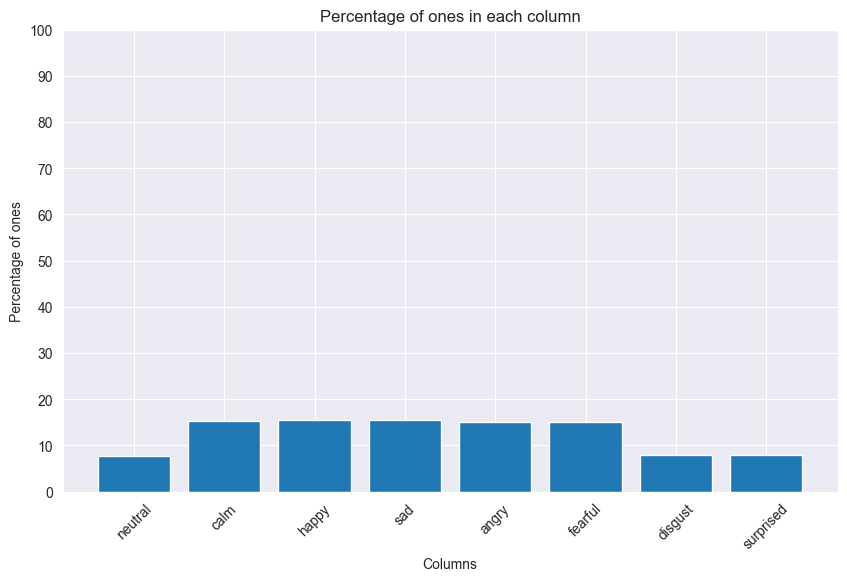

In [7]:
plot_percentage(df, emotions)

In [8]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler

def isomap_by_emotion(data, emotions_list, emotion):

    data2 = data.drop(emotions_list, axis=1)
    X_scaled = MinMaxScaler().fit_transform(data2)

    isomap = Isomap(n_components=2)
    embedding = isomap.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=data[emotion], cmap='viridis')
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.title(f'Scatterplot of {emotion} attribute using Isomap')
    plt.show()

In [9]:
from sklearn.decomposition import PCA

def pca_by_emotion(data, emotions_list, emotion):

    data2 = data.drop(emotions_list, axis=1)
    X_scaled = MinMaxScaler().fit_transform(data2)

    pca = PCA(n_components=2)
    embedding = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=data[emotion], cmap='viridis')
    plt.xlabel('First component')
    plt.ylabel('Second component')
    plt.title(f'Scatterplot of {emotion} attribute using PCA')
    plt.show()

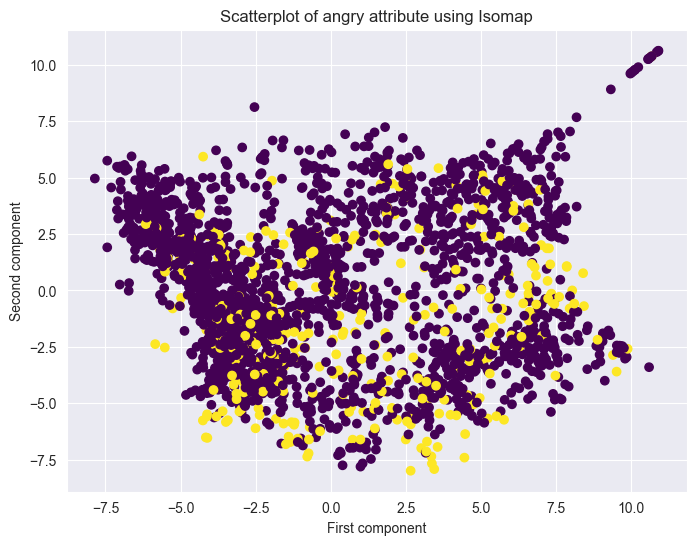

In [10]:
numerical_attr_list = [col for col in df.columns if is_numeric_dtype(df[col])]
isomap_by_emotion(df[numerical_attr_list], emotions, 'angry')

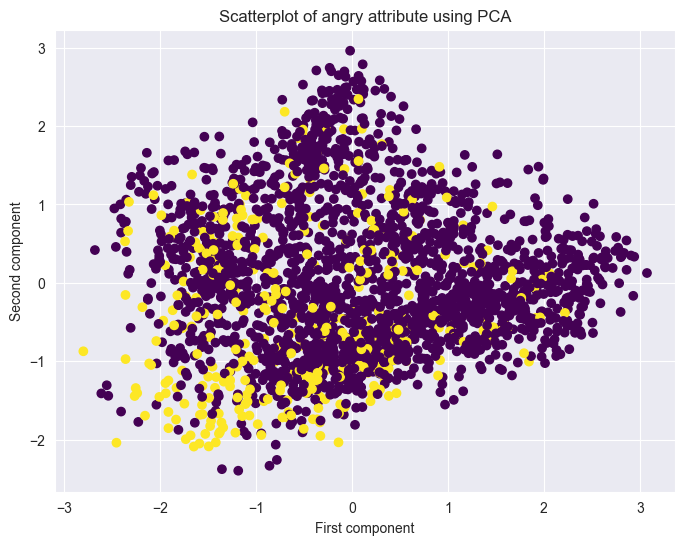

In [11]:
pca_by_emotion(df[numerical_attr_list], emotions, 'angry')

In [12]:
df_clf = df.drop(emotions, axis=1)
target = df['angry']

In [13]:
split_index = df.index[df['actor'] == 'actor_19'][0]

df_train = df_clf[:split_index]
df_test = df_clf[split_index:]

target_train = target[:split_index]
target_test = target[split_index:]

display(df_train.shape, df_test.shape)

(1796, 249)

(615, 249)

In [14]:
numerical_attr_list = [col for col in df_clf.columns if is_numeric_dtype(df_clf[col])]

df_train = df_train[numerical_attr_list]
df_test = df_test[numerical_attr_list]

In [15]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(df_train)
X_test = scaler.fit_transform(df_test)

y_train = target_train.to_numpy()
y_test = target_test.to_numpy()

# Undersampling

## CNN

In [16]:
from collections import Counter
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=42, n_jobs=-1)
X_res, y_res = cnn.fit_resample(X_train, y_train)

print(f'Starting dataset shape {Counter(y_train)}')
print(f'Resampled dataset shape {Counter(y_res)}')

Starting dataset shape Counter({False: 1528, True: 268})
Resampled dataset shape Counter({False: 366, True: 268})


In [17]:
from sklearn.neighbors import KNeighborsClassifier
